(sec:ode-initial-value-problems)=
# Initial Value Problems

Consider a physical quantity $\mathbf{x}$, which is usually scalar or vector in physics but can be any collection of quantities.  It is a function of a single parameter $t$, which is often time in physics and thus we shall call *time* in this section.  However, it can be an other kind of parameter. Laws of physics provides a relation among, $t$, $\mathbf{x}(t)$ and its derivatives, usually up to the second order, in a form of differential equation.  We want find an explicit expression of $\mathbf{x}(t)$ from the differential equation.   In this section, we focus on a particular situation where $\mathbf{x}(t)$ and optionally its derivatives are known at a certain time $t_0$

We begin with first-order ODEs expressed in a standard form:

$$
\dot{\mathbf{x}} = \mathbf{F}(\mathbf{x},t) 
$$

where $\mathbf{F}$ is a function of $\mathbf{x}$ and $t$.  We assume that the ODE has a unique solution. To solve it, we need to know $\mathbf{x}$ at some point $t=t_0$.  Usually, $t_0$ is an initial time and we want to know $\mathbf{x}(t)$ for $t>t_0$.  However, $t_0$ can be any point in time from which we can find solution for $t < t_0$ as well.  Once $\mathbf{x}(t_0)$ is given, we can find $x$ at any point $t$.  We 


Second order ODEs are also popular in physics, for example the Newton's equations of motion.  They are usually expressed as

$$
\ddot{\mathbf{x}} = \mathbf{F}(\mathbf{x},\dot{\mathbf{x}},t)
$$

Two initial conditions, usually $\mathbf{x}(t_0)$ and $\dot{\mathbf{x}}(t_0)$, are required to solve this equation.  The two conditions can be specified at two different points $\mathbf{x}(t_0)$ and $\mathbf{x}(t_1)$, which will be discussed in {numref}`sec:ode-boundary-value-problems`.
In general, the second order ODEs of this kind can be transformed to a pair of first order ODEs. Therefore, numerical methods for the first order ODEs can be used to solve the second order ODEs as well.  However, there are also algorithms specific to the second order ODEs such as the Verlet argorithm, which can be more efficient in certain applications.


## First Order ODEs

For simplicity, we focus on the first order ODE of a single scalar variable $x$ for a while. Multivariable cases will be discussed in the later subsections. More specifically, we want to solve the following type of ODE:

$$
\dot{x} = F(x,t)
$$(eq:ode-1d)

for a given function $F(x,t)$ and an initial condition $x(t_0)$ .  The exact solution is a continuous function $x(t)$ for a time period from an initial time $t_0$ to a final time $t_F$.  However, in the computer we work with discrete time $t_n = t_0 + n h,\, n=0, \cdots, N$ where $h$ is a time step defined by $h=\displaystyle\frac{t_F-t_0}{N}$.  The numerical solution is expressed as a sequence $x(t_0), x(t_1), x(t_2), \cdots, x(t_N)$.  For convenience, we simplify the expression them as $x_{n} \equiv x(t_n)$ and also $F_n = F(x_n,t_n)$.  Our goal is to develop numerical algorithms to predict $x_{n+1})$  knowing the previous points $x_n$. We can construct the whole sequence by repeating the procedure recursively starting from $x_0$.   

To develop numerical methods to solve the ODE {eq}`eq:ode-1d`, we use several mathematical tools. First, the Taylor expansion:

$$
x_{n+1} = x(t_n+h) = x(t_n) + \dot{x}(t_n) h + \ddot{x}(t_n) \frac{h^2}{2} + \cdots
$$(eq:ode-taylor1a)

is quite useful.

We rewrite the ODE in a different mathematical form suitable for the development of numerical methods.  The basic idea is to construct a recursive equation.  There are two common approaches, one based on the [mean value theorem](https://en.wikipedia.org/wiki/Mean_value_theorem) and the other on integral equation. 
The mean value theorem states that there exist $c$ in $(a,b)$ such that $f'(c) = \displaystyle\frac{f(b)-f(a)}{b-a}$ where $f'(x) = \frac{d f}{d x}$.  Applying it to our problem, there exists $s \in (t_n,t_{n+1})$ such that 

$$
\frac{x(t_{n+1}) - x(t_{n})}{h} = \dot{x}(s) = F\left[x(s),s\right],\quad t_n < s < t_{n+1}.
$$(eq:ode-taylor1b)

from which we write the future point $x_{n+1}$ as

$$
x_{n+1} = x_n + h F\left[x(s),s\right]
$$(eq:ode-mean-value)

This equation is still not computable since we don't know the value of $s$ and $x(s)$ in the right hand side.  We need to invent an approximation to estimate $F(x(s),s)$. The second approach is to rewrite the ODE in a form of integral.  Integrating the both sides of the ODE, we obtain

$$
x_{n+1} = x_n + \int_{t_n}^{t_{n+1}} F[x(s),s]\, ds\, .
$$(eq:ode-integral)

which is another exact relation.  To carry out the integral we need to know $x(s)$ but it is the solution of the ODE we are tying to find. Therefore, we need a method to approximately estimate the integral without the knowledge of $x(s)$.

The two expressions, {eq}`eq:ode-mean-value` and {eq}`eq:ode-integral`, are mathematically equivalent since there is $s \in (t_n,t_{n+1})$  such that $\int_{a}^{b} f(x) dx = (b-a) f(s)$.  At the end the both approaches reach the same outcome. However, the two approaches provide different visual interpretations. Looking at the same problem from two different views may help us to develop a better approximation for a higher accuracy. In either approach, we construct a recursive equation and we obtain the solution $x(t_0), x(t_1), x(t_2), \cdots, x(t_N)$ one by one recursively.  To do so, we must find a good estimate of $F\left[x(t),t\right]$ for the interval $(t_n,t_{n+1})$.   


### Euler method

We being with the simplest method which may not be useful in practical applications but gives us some idea of how numerical integration of an ODE works. Consider the Tayler expansion {eq}`eq:ode-taylor1a`.  If $h$ is small enough, we can ingnore the terms of order $h^2^ and higher, then we have

$$
x(t_n+h) = x(t_n) + \dot{x}(t_n) h + \mathcal{O}(h^2)
$$(eq:euler-rule)

Using the ODE, we replace $\dot{x}(t_n)$ with $F(x(t_n),t_n)$ which leads to a recursive equation

$$
x_{n+1} = x_n + F_n\, h
$$(eq:euler-rule)

where $\mathcal{O}(h^2)$ ignored.  The recursive equation is known as the Euler rule .  The visual interpretation of the Euler method is quite simple.  First we assumes that the curve $x(t)$ is approximately a straight line between $t_n$ and $t_{n+1}$.  The slope of the curve is unknown except at $t_n$.  So, we just use $\dot{x}(t_n) = F_n$ as the slope. (See the right panel of {numref}`fig:euler-ode`.)
We further justify the Euler method using the forward finite difference approximation of derivative ({numref}`sec:finite-diff`). Substituting the forward finite difference method, $\dot{x}(t_n) = (x_(t_n+h)-x(t_n))/h$ to the ODE, we obtain {eq}`eq:euler-rule`.  Hence the Euler method is equivalent to use the forward finite difference method to evaluate the derivative in the ODE. 
From the prospect of Eq. {eq}`eq:ode-mean-value`, the unknown $s$ is replaced with $t_n$, which is exactly the forward finite difference method. 
In {eq}`eq:ode-integral`, the integral is approximated by the rectangular rule ({numref}`sec:piecewise-integral`) as illustrated in the left panel of {numref}`fig:euler-ode`.

To get the whole sequence $\{x_n\}$ starting from the initial value, $x_0$, we first evaluate $F_0=F(x_0,t_0)$.  Then, $x_1$ is predicted by Eq. {eq}`eq:euler-rule`.
Using this procedure recursively, we obtain the whole sequence from $x_0$ to $x_N$.  This method is known as the Euler method.

Earlier, we learned that neither the forward finite different method nor the rectangular rule is accurate enough in practical applications. Therefore, we don't expect that the Euler method is a good method. From the Tayler exapansion, the order of error is $h^2$ for each step.
After $N$ iteration, the global error becomes $N \mathcal{O}(h^2) \sim \mathcal{O}(h)$.  We hope that this is a good approximation with a sufficiently small $h$. However, the order $h$ of error is not acceptable and thus the Euler method is not good enough in practice. 


```{figure} euler-ode.webp
:name: fig:euler-ode
Illustration of the Euler method.  *Left*: The blue line represents the integrand of Eq. {eq}`eq:ode-integral` which is unknown to us. Assuming that $F_n$ is on the exact curve, we approximate the integral (the shaded area) by the rectangular rule (the area of the blue rectangle) discussed in {numref}`sec:piecewise-integral`.  The unaccounted area is proportional to $h^2$.  *Right*: Using the slope of the curve at $t_n$,  we extrapolate next point $x_{n+1}$ assuming the curve is close to the straight line (red line). This is equivalent to use the forward finite difference method of the first order derivative discussed in {numref}`sec:finite-diff`.  Note that even if $x_n$ is on the exact curve, $x_{n+1}$ is not.  The error is clearly visible.
```

```{admonition} Algorithm 6.1.1:  Euler method

1. Set the total period $T$ and the number of steps $N$
2. Calculate the step size $h=\displaystyle\frac{T}{N}$.
3. Set the initial condition $x_0$ and $t_0=0$.
4. Starting with $n=0$, repeat the following $N$ times
   1. Evaluate the function $F_n=F(x_n,t_n)$.
   2. Calculate a new point $x_{n+1}=x_n+F_n h$.
   3. Increment the step: $n=n+1$.
```

### Predictor-Corrector Method

One way to raise the accuracy of the Euler method is to use a more accurate slope.  Consider another Taylor expansion around $t_{n+1}$ with the negative step $-h$:

$$
x(t_n) = x(t_n+h) - \dot{x}(t_n+h) h + \ddot{x}(t_n+h) \frac{(-h)^2}{2} + \cdots.
$$(eq:ode-taylor2)

Subtract Eq. {eq}`eq:ode-taylor2` from Eq. {eq}`eq:ode-taylor1a` and rearrange the result, we find

$$
x_{n+1} = x_n + \frac{h}{2}[\dot{x}(t_n)+\dot{x}(t_{n+1})] + \frac{h^2}{4}[\ddot{x}(t_n) - \ddot{x}(t_{n+1})] + \cdots =  x_n + \frac{h}{2}[\dot{x}(t_n)+\dot{x}(t_{n+1})] + \mathcal{O}(h^3)
$$

where we used $\ddot{x}(t_n) - \ddot{x}(t_{n+1}) \sim \mathcal{O}(h)$.  Replacing $\dot{x}$ with $F(x,t)$, we obtain a relation similar to the Euler rule {eq}`eq:euler-rule`:

$$
x_{n+1} = x_n + \frac{ F_n + F_{n+1} }{2} h.
$$(eq:ode-implicit)

Comparing this equation with the Euler rule {eq}`eq:euler-rule`, the slope  $F_n$ is replaced with the average of the current slope $F_n$ and future slope $F_{n+1}$ (the right panel of {numref}`fig:predict-correct`.  The order of error is $h^3$, better than $h^2$ of the Euler method.

From the view of {eq}`eq:ode-mean-diff`, the right hand side is replaced by the average:

$$
F(x(s),s) \approx \frac{1}{2}( F_n + F_{n+1} ).
$$(eq:ode-mean-diff)

Similarly, we can improve the accuracy of the integral in {eq}`eq:ode-integral` by using  the trapezoidal rule instead of the rectangular rule (see the left panel of {numref}`fig:predict-correct`):

$$
\int_{t_n}^{t_{n+1}} F[x(t),t] dt \approx \frac{F_n + F_{n+1}}{2} h.
$$(eq:ode-trapezoidal)

In either approach, we obtain the same relation {eq}`eq:ode-implicit`.

Unlike the Euler rule {eq}`eq:euler-rule`, Eq. {eq}`eq:ode-implicit` is implicit since the both sides contain future point $x_{n+1}$.  Solving it for $x_{n+1}$ is not a trivial task.  A common approach is the following iterative method. First we guess the solution, which we denote as $x^{(0)}_{n+1}$. Using it in the right hand side of {eq}`eq:ode-implicit`, we obtain a new prediction $x^{(1)}_{n+1}$.  Then, plug it in the right hand side again, we get another prediction $x^{(2)}_{n+1}$.  By repeating this procedure, the difference between the input and the output becomes negligible after a certain number of iterations, that is $x^{(k+1)}_{n+1} \approx x^{(k)}_{n+1}$. We say that the input and the output is now self-consistent.  We can stop the iteration when a desired accuracy is achieved.  The iterative method is not stable and can go wrong after many iterations.  There are ways to stabilize the iteration which we will discuss in a later chapter.

To apply the iterative method to the our problem, we use the Euler rule to get the good first guess: $x^{(0)}_{n+1} = x_n + F_n h$.  The output of the first iteration is 

$$
x^{(1)}_{n+1} = x_n + \frac{F(x_n,t_n) + F(x^{(0)}_{n+1},t_{n+1})}{2}h
$$

If the output is not accurate enough, we go to the next round.  Since {eq}`eq:ode-implicit` is valid only at the order of $h^3$, we don't have to iterate the procedure many times.  Anything better than the Euler rule is good enough.  Hence, no further iteration is necessary in the current approximation.  Now, we have a future point $x^{(1)}_{n+1}$, which is better than the Euler rule. 

In summary, we *predict* $x_{n+1}$ using the Euler method. Let the first slope $k_1 = F(x_n,t_n)$.  Then, $x^{(0)}_{n+1} = x_n + k_1 h$.  At the second step, we evaluate the second slope $k_2 = F(x^{(0)}_{n+1},t_{n+1}) = F(x_n + k_1 h, t_n)$ .  Then *correct* $x^{(0)}_{n+1}$ using the second slope by Eq. {eq}`eq:ode-implicit`.  The new $x_{n+1}$ is given by

$$
x^{(1)}_{n+1} \approx x_n + \frac{h}{2} (k_1 + k_2).
$$(eq:ode-predictor-corrector)

This is the "predictor-corrector" method.    The order of error at each step is determined by the trapezoidal rule, that is $\mathcal{O}(h^3)$.   Thus the overall error is $N \mathcal{O}(h^3) \sim \mathcal{O}(h^2)$.

```{figure} predict-correct.webp
:name: fig:predict-correct
Illustration of the predictor-corrector method.  *Left*: The blue line represents the integrand of Eq. {eq}`eq:ode-integral`, which is unknown to us. Assuming that we know both $F(x(t_n),t_n)$ and $F(x(t_{n+1}),t_{n+1})$, we approximate the integral by the trapezoidal rule discussed in {numref}`sec:piecewise-integral`.  The unaccounted area is proportional to $h^2$.  *Right*: Using the two slopes (two green lines) $\dot{x}_n = F(x(t_n),t_n)$ and $\dot{x}_{n+1} = F(x(t_{n+1}),t_{n+1})$,  we approximate $\dot{x}(t)$ with the average of the two slopes.  This is equivalent to use the mean finite difference method of the first order derivative discussed in {numref}`sec:finite-diff`.
```

```{admonition} Algorithm 6.1.2:  Predictor-corrector method

1. Set the total period $T$ and the number of steps $N$
2. Calculate the step size $h=\displaystyle\frac{T}{N}$.
3. Set the initial condition $x_0$ and $t_0=0$.
4. Starting with $n=0$, repeat the following $N$ times
   1. first slope: $k_1 = F(x_n,t_n)$
   2. predictor: $x_{n+1} = x_n + k_1 h$.
   2. second slope: $k_2 = F(x_{n+1},t_{n+1})$.
   3. corrector: $x_{n+1}=x_n + \displaystyle\frac{h}{2} \left ( k_1 + k_2 \right )$.
   4. Increment the step: $n=n+1$.
```

**Example** {numref}`%s.1 <sec:ode-initial-value-problems>`

A particle of mass $m$ is dropped from rest under a uniform gravity $g$.  The drag force due to the presence of air is $-\gamma v$ where $v$ is velocity and $\gamma$ the frictional coefficient. The equation of motion is given by the Newton equation:

$$
m \dot{v} = - \gamma v - m g
$$(eq:eom-free-falling)

and its solution with the initial condition $v(0)=0$ is given by

$$
v(t) = \frac{m g}{\gamma} \left ( e^{-\gamma t} -1 \right )\,.
$$

where $-m g /\gamma$ is the terminal velocity.

Let us integrate the Newton equations using Euler and Predictor-Corrector methods and compare the results with the exact solution.  We integrate from $t=0$ to $t=10$ using the step size $h=0.01$.  As usual, we simplify the mathematical expression by normalizing quantities and reduce the number of parameters.  By normalizing the time as $\tau =\gamma t/m$ and introducing a new constant $\xi = m  g \gamma$, Eq. {eq}`eq:eom-free-falling` becomes $\dot{v} = -v + \xi$ where $\dot{v} = \frac{dv}{d\tau}$.   Now, we have only one parameter $\xi$ and the terminal velocity is given by $-\xi$.



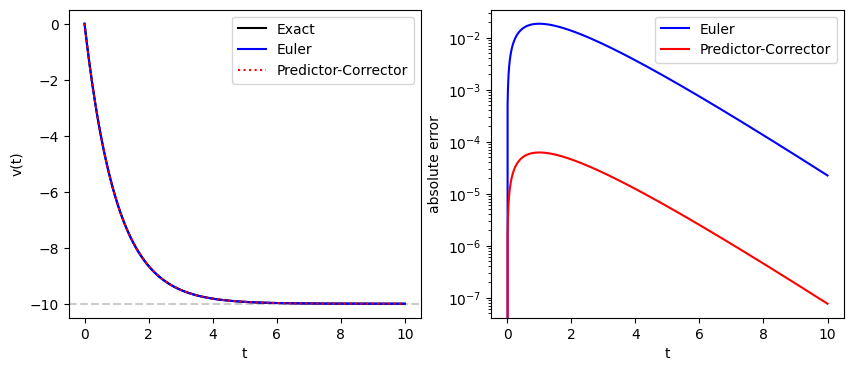

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parameter
g=10.0

# integration parameters
tmax=10.  # maximum time
N=1000   # maximum steps
h=tmax/N # time step

# set arrays
v_ex=np.zeros(N+1)
v_eu=np.zeros(N+1)
v_pc=np.zeros(N+1)
t=np.linspace(0,N,N+1)*h

# intial condition
v_ex[0]=0.0
v_eu[0]=0.0
v_pc[0]=0.0

for i in range(0,N):
    # Euler method
    F = -v_eu[i] - g 
    v_eu[i+1] = v_eu[i] + F*h
    
    # Predictor-Corrector method
    F= -v_pc[i] - g
    v_pc[i+1] = v_pc[i] + F*h;  # predictor
    F = -(v_pc[i]+v_pc[i+1])/2 - g
    v_pc[i+1] = v_pc[i] + F*h   # corrector
    
    # Exact solution
    v_ex[i+1] = g*(np.exp(-t[i+1])-1)

plt.ioff()
plt.figure(figsize=(10,4))

# Plot the solutions
plt.subplot(1,2,1);
plt.axhline(y = -g, color = '0.8', linestyle = '--')
plt.plot(t,v_ex,'-k',label='Exact')
plt.plot(t,v_eu,'-b',label='Euler')
plt.plot(t,v_pc,':r',label='Predictor-Corrector')

plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend(loc=1)

# Plot the absolute errors
plt.subplot(1,2,2)
plt.semilogy(t,abs(v_eu-v_ex),'-b',label='Euler')
plt.semilogy(t,abs(v_pc-v_ex),'-r',label='Predictor-Corrector')

plt.xlabel('t')
plt.ylabel('absolute error')
plt.legend(loc=1)
plt.show()

The left plots show that the trajectories of the two numerical methods agree with the exact trajectory at least in he naked eyes.  The right panel plots the absolute errors.  The predictor-corrector method is significantly better than the Euler method.

### 2nd-order Runge-Kutta Method

The Runge-Kutta (RK) developed a systematic way to improve the accuracy of the numerical integration of ODEs based on the Taylor expansion. The expression of the method is not unique.  In fact, there are infinitely many expressions which produces the same outcome.  Here we introduce the most popular expression. The general theory of the RK method is a bit complicated and not discussed here.  We resort to a heuristic approach.

This time we approximate the integral as

$$
\int_{t_n}^{t_{n+1}} F(x(s),s) ds \approx F(x_{n+1/2},t_{n+1/2}) h
$$

which is quite similar to the trapezoid rule. See Fig.  This approximation implies

$$
x_{n+1} \approx x_n + h F_{n+1/2}.
$$(eq:pre-rk2)

To use this approximation, $F_{n+1/2}$ needs to be evaluate, which requires $x_{n+1/2}$. Hence, we need further approximation.  The simplest approach is to estimate it with the Eeuler method:

$$
x_{n+1/2} \approx x_n + \frac{h}{2} F_n
$$

Substitntuting this approximation to {eq}`eq:pre-rk2`, we obtain

$$
x_{n+1} \approx x_n +  h F\left(x_n+\frac{h}{2} F_n,t_{n+1/2}\right).
$$ (eq:rk2)

which is known as the second order Runge-Kutta method.  The error of this method is essentially the same as that of the predictor-corrector method.
and thus the second order Runge-Kutta method is just as good (bad) as the predictor-corrector method and no particular advantage over it.



```{figure} rk2.webp
:name: fig:rk2
Illustration of the predictor-corrector method.  *Left*: The blue line represents the integrand of Eq. {eq}`eq:ode-integral`, which is unknown to us. Assuming that we know both $F(x(t_n),t_n)$ and $F(x(t_{n+1}),t_{n+1})$, we approximate the integral by the trapezoidal rule discussed in {numref}`sec:piecewise-integral`.  The unaccounted area is proportional to $h^2$.  *Right*: Using the two slopes (two green lines) $\dot{x}_n = F(x(t_n),t_n)$ and $\dot{x}_{n+1} = F(x(t_{n+1}),t_{n+1})$,  we approximate $\dot{x}(t)$ with the average of the two slopes.  This is equivalent to use the mean finite difference method of the first order derivative discussed in {numref}`sec:finite-diff`.
```

```{admonition} Algorithm 6.1.2:  2nd-order Runge-Kutta method

1. Set the total period $T$ and the number of steps $N$
2. Calculate the step size $h=\displaystyle\frac{T}{N}$.
3. Set the initial condition $x_0$ and $t_0=0$.
4. Starting with $n=0$, repeat the following $N$ times
   1. Predictor: $k_1 = F(x_n,t_n)$
   2. Corrector: $k_2 = F(x_n+k_1 h/2,t_{n}+h/2)$.
   3. New point: $x_{n+1}=x_n + k_2 h$.
   4. Increment the step: $n=n+1$.
```

### 4th-Order Runge-Kutta Method

The Runge-Kutta approach a;;ows us to systematically improve the accuracy.  The second RK method evaluate $F(x,t)$, twice per step.  Now consider a RK method that evaluate it four times per step, which is known as the 4th order RK method.  Since the rigorous derivation of this formula is a bit complicated, we resort to a heuristic consideration.

In order to further improve the accuracy, we use a better numerical integration method, the Simpson rule:

$$
\int_{x_n}^{x_{n}+h} F(x(t),t) dt = \frac{h}{6} \left ( F_n + 4 F_{n+1/2} + F_{n+1} \right ) + \mathcal{O}(h^5) .
$$(eq:rk4-simpson)

We learned that the Simpson rule is highly accurate.  However, in order to take the advantage, we must carefully evaluate $F_{n+1/2}$ and $F_{n+1}$ to keep the high level of accuracy.  Recalling that the high accuracy of the Simpson rule is due to the symmetric treatment of intervals $[t_n,t_{n+1/2}]$ and $[t_{n+1/2},t_{n+1}]$ so that errors in the two interval cancel out. (See Sec. {numref}`sec:piecewise-integral`.)  The key point is how to evaluate the mid point $x_{n+1/2}$. As usual, we begin with the Euler method in which we predict $x_{n+1/2}$ using the slope $k_1 \equiv F(x_n,t_n)$. 

$$
F_{n+1/2}^{(0)}= F\left(x_n + \frac{h}{2} k_1,t_{n+1/2}\right)  \equiv k_2 .
$$(eq:rk4-k2)

If the curve $x(t)$ is concave (convex), the Euler method over-(under-)estimate $x_{n+1/2}$.  Now we try to correct the error using the slope at $t_N{n+1/2}$, that is $k_2$.

$$
F_{n+1/2}^{(1)} = F\left(x_n + \frac{h}{2} k_2,t_{n+1/2}\right)  \equiv k_3 .
$$(eq:rk4-k3)

Knowing that  $k_2<k_1$ for concave curve and $k_2 < k_1$ for convex curve,  the direction of error in $F_{n+1/2}^{(1)}$ is opposite to that in $F_{n+1/2}^{(0)}$.  The average of the two predictions cancels their errors.  Now, we have a much better approximation 

$$
F_{n+1/2} = \frac{1}{2}(F_{n+1/2}^{(0)}+F_{n+1/2}^{(1)}) = \frac{1}{2}(k_2+k_3) .
$$(eq:rk4-k23)

Using the midpoint formula we obtain 

$$
F_{n+1} = F\left[x_n+\frac{h}{2}(k_2+k_3), t_{n+1}\right]
$$(eq:rk4-endpoint1)

It turns out that 

$$
F_{n+1}= F(x_n+ h k_3, t_{n+1})  \equiv k_4 
$$(eq:rk4-endpoint2)

is good enough.  


Substituting {eq}`eq:rk4-k23` and {eq}`eq:rk4-endpoint2` to {eq}`eq:rk4-simpson` we obtain the 4th-order Runge-Kutta method

$$
x_{n+1} = x_n + \frac{h}{6}\left(k_1 + 2 k_2 + 2 k_3 + k_4\right).
$$

This method is accurate enough for most of practical applications.


### Adaptive Step: Runge-Kutta-Fehlberg Method

## Coupled First Order ODEs

## Second-Order ODEs

### Second-Order ODEs as a Coupled First-Order ODEs

### Verlet Method